In [ ]:
#hapiness_complete.csv

In [49]:
%matplotlib inline

In [50]:
import time
import matplotlib

import numpy as np
import pandas as pd

import plotly.subplots as psp
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.express as px

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans

from plotly.offline import iplot, download_plotlyjs, init_notebook_mode, plot
from chart_studio.plotly import plot, iplot

import os
import sys
import re

In [51]:
happiness = pd.read_csv('hapiness_complete.csv')
happiness.describe()

,Unnamed: 0,Region Indicatior,year,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Life Ladder,Log GDP per capita,Healthy life expectancy at birth,Perceptions of corruption
count,2098.000000,0.0,2098.000000,149.000000,149.000000,2085.000000,149.000000,2066.000000,2009.000000,1949.000000,1913.000000,1894.000000,1839.000000
mean,1048.500000,NaN,2013.768827,5.532839,9.432208,0.812709,64.992799,0.746094,-0.001027,5.466705,9.368453,63.359374,0.747125
std,605.784753,NaN,4.486449,1.073924,1.158601,0.118203,6.762043,0.140766,0.161400,1.115711,1.154084,7.510245,0.186789
min,0.000000,NaN,2005.000000,2.523000,6.635000,0.290000,48.478000,0.258000,-0.335000,2.375000,6.635000,32.300000,0.035000
25%,524.250000,NaN,2010.000000,4.852000,8.541000,0.750000,59.802000,0.652000,-0.115000,4.640000,8.464000,58.685000,0.690000
50%,1048.500000,NaN,2014.000000,5.534000,9.569000,0.835000,66.603000,0.767000,-0.027000,5.386000,9.460000,65.200000,0.802000
75%,1572.750000,NaN,2018.000000,6.255000,10.421000,0.905000,69.600000,0.859000,0.089000,6.283000,10.353000,68.590000,0.872000
max,2097.000000,NaN,2021.000000,7.842000,11.647000,0.987000,76.953000,0.985000,0.698000,8.019000,11.648000,77.100000,0.983000


In [52]:
len(happiness)

2098

In [53]:
happiness.dtypes

Unnamed: 0                            int64
Region Indicatior                   float64
Country name                         object
year                                  int64
Ladder score                        float64
Logged GDP per capita               float64
Social support                      float64
Healthy life expectancy             float64
Freedom to make life choices        float64
Generosity                          float64
Life Ladder                         float64
Log GDP per capita                  float64
Healthy life expectancy at birth    float64
Perceptions of corruption           float64
dtype: object

In [54]:
happiness.isnull().sum()

Unnamed: 0                             0
Region Indicatior                   2098
Country name                           0
year                                   0
Ladder score                        1949
Logged GDP per capita               1949
Social support                        13
Healthy life expectancy             1949
Freedom to make life choices          32
Generosity                            89
Life Ladder                          149
Log GDP per capita                   185
Healthy life expectancy at birth     204
Perceptions of corruption            259
dtype: int64

In [55]:
happiness.duplicated().sum()

0

## fig practice
pairplot to compare realationships between variables.

<Figure size 1080x1080 with 0 Axes>

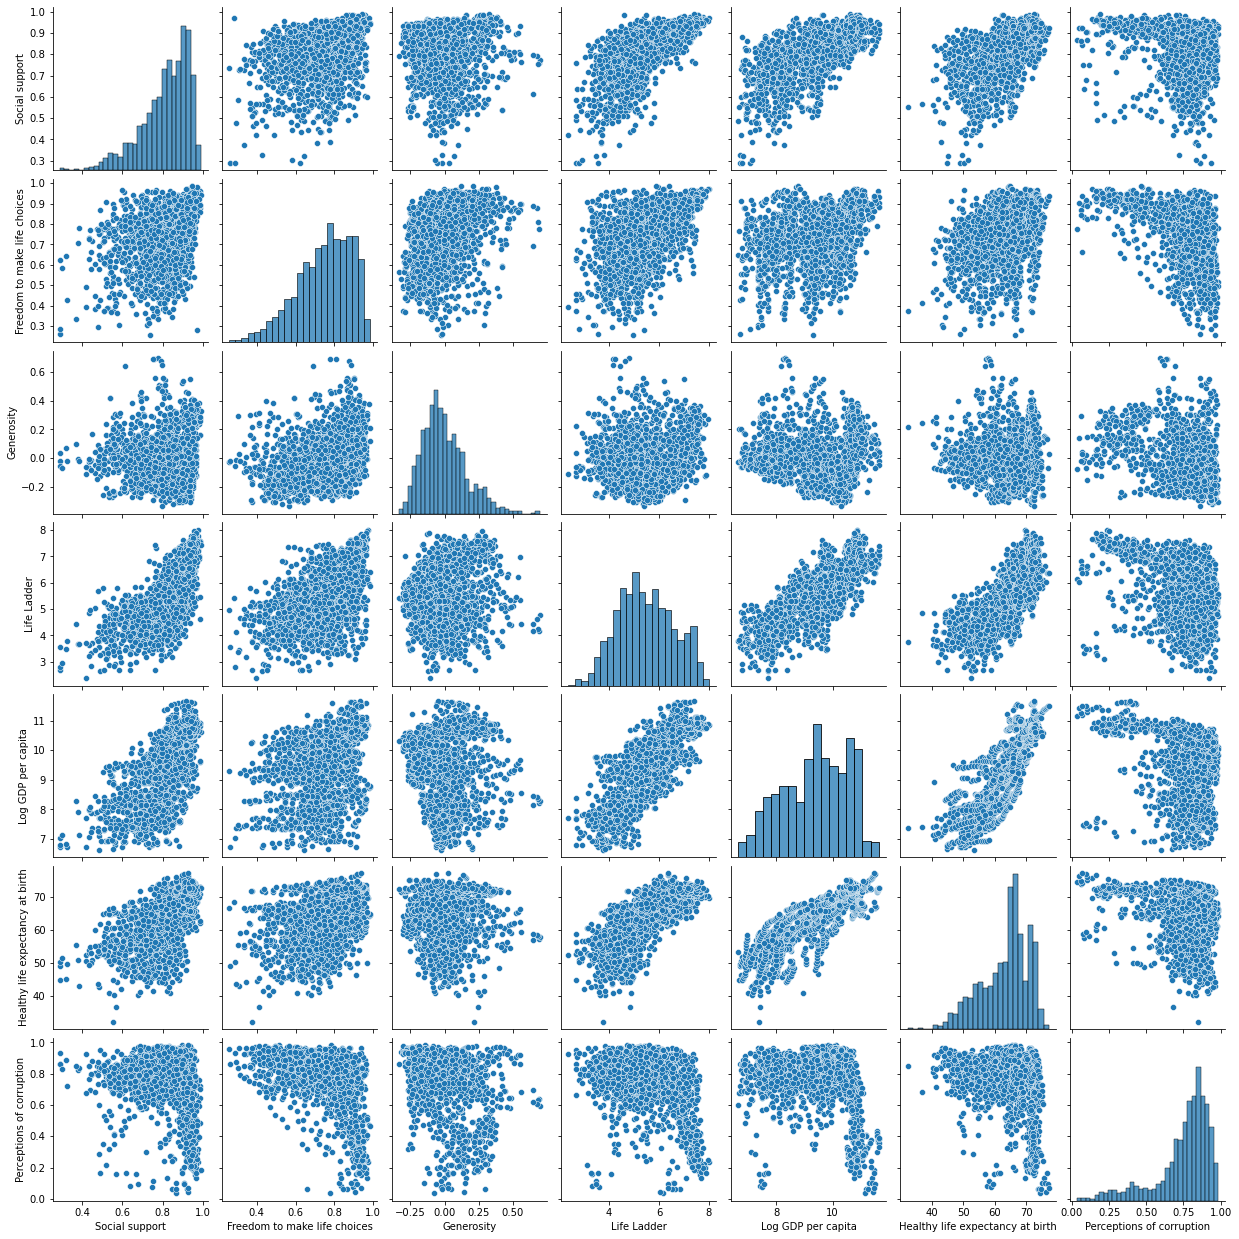

In [56]:
fig = plt.figure(figsize = (15,15))
sns.pairplot(happiness[['Social support', 'Freedom to make life choices', 'Generosity', 'Life Ladder', 'Log GDP per capita', 'Healthy life expectancy at birth', 'Perceptions of corruption']])

### Visualization: Correlations among variables

We're building an understanding between the variables that have been provided in this dataset. We are computing the correlations among the variables in a heat map.

/var/folders/dn/kc445x893192vp18hkvcvs000000gn/T/ipykernel_956/2025737695.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



<AxesSubplot:>

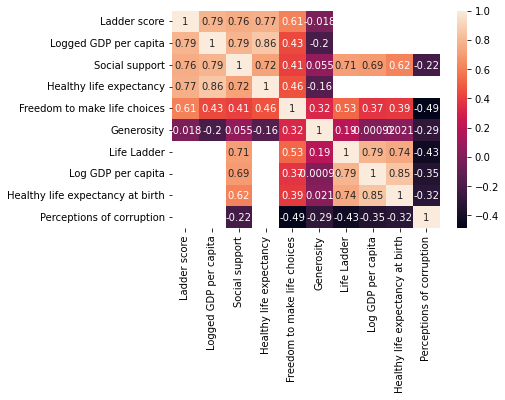

In [57]:
happiness.hm = happiness[['Ladder score', 'Logged GDP per capita', 'Social support','Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Life Ladder', 'Log GDP per capita', 'Healthy life expectancy at birth', 'Perceptions of corruption']]
cor = happiness.hm.corr()
sns.heatmap(cor, annot = True)

### Outcome :
The color pallete on the side of the heat map is represented as the amount of correlations among the variables. The higher score is shown in the middle of the heat map going down diagonally.

### Lets Rank Countries Happiness 

In [58]:
happiness['Yearly Ranking'] = happiness.groupby('year')['Life Ladder'].rank(method='first',ascending=False)
happiness['Inverse Yearly Ranking'] = happiness.groupby('year')['Life Ladder'].rank(method='first')
happiness

,Unnamed: 0,Region Indicatior,Country name,year,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Life Ladder,Log GDP per capita,Healthy life expectancy at birth,Perceptions of corruption,Yearly Ranking,Inverse Yearly Ranking
0,0,NaN,Finland,2021,7.842,10.775,0.954,72.0,0.949,-0.098,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,Denmark,2021,7.620,10.933,0.954,72.7,0.946,0.030,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,Switzerland,2021,7.571,11.117,0.942,74.4,0.919,0.025,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,Iceland,2021,7.554,10.878,0.983,73.0,0.955,0.160,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,Netherlands,2021,7.464,10.932,0.942,72.4,0.913,0.175,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2093,2093,NaN,Zimbabwe,2016,NaN,NaN,0.768,NaN,0.733,-0.095,3.735,7.984,54.4,0.724,132.0,11.0
2094,2094,NaN,Zimbabwe,2017,NaN,NaN,0.754,NaN,0.753,-0.098,3.638,8.016,55.0,0.751,139.0,9.0
2095,2095,NaN,Zimbabwe,2018,NaN,NaN,0.775,NaN,0.763,-0.068,3.616,8.049,55.6,0.844,135.0,8.0
2096,2096,NaN,Zimbabwe,2019,NaN,NaN,0.759,NaN,0.632,-0.064,2.694,7.950,56.2,0.831,143.0,2.0


In [59]:
# building a graph with buttoms to show yearly outcomes: top 10 countries.
happiness = happiness.query("`Yearly Ranking` <= 10").sort_values('year')


rank_happiness = px.bar(
    happiness,
    x='Life Ladder',
    y='Yearly Ranking',
    animation_frame='year',
    animation_group='Country name',
    color='Country name',
    text='Country name',
    title='Happiness score - Top 10 countries',
    orientation='h',
    range_x=[0,8.5])
rank_happiness.layout.updatemenus[0].buttoms[0].args[1]
['frames']['duration'] = 2000
rank_happiness.update_layout(showledge=False)


AttributeError: 'Updatemenu' object has no attribute 'buttoms'

In [60]:
happiness.corr()

,Unnamed: 0,Region Indicatior,year,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Life Ladder,Log GDP per capita,Healthy life expectancy at birth,Perceptions of corruption,Yearly Ranking,Inverse Yearly Ranking
Unnamed: 0,1.000000,NaN,-5.179298e-03,NaN,NaN,-0.114435,NaN,-0.182780,-0.145546,-0.153721,0.052712,-0.169657,-0.065026,4.913539e-02,-0.065584
Region Indicatior,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,-0.005179,NaN,1.000000e+00,NaN,NaN,0.024058,NaN,0.200100,-0.232790,0.177151,0.314613,0.612752,-0.308423,3.370776e-16,0.604652
Ladder score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Logged GDP per capita,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Social support,-0.114435,NaN,2.405789e-02,NaN,NaN,1.000000,NaN,0.494320,0.358055,0.344659,0.332716,0.344144,-0.286332,-4.269645e-01,-0.068544
Healthy life expectancy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Freedom to make life choices,-0.182780,NaN,2.000997e-01,NaN,NaN,0.494320,NaN,1.000000,0.227163,0.349528,0.456683,0.406704,-0.647072,-3.277278e-01,0.052245
Generosity,-0.145546,NaN,-2.327898e-01,NaN,NaN,0.358055,NaN,0.227163,1.000000,0.012193,0.240133,0.271010,-0.089030,-4.926805e-02,0.035673
Life Ladder,-0.153721,NaN,1.771510e-01,NaN,NaN,0.344659,NaN,0.349528,0.012193,1.000000,0.234510,0.249795,-0.413458,-8.294833e-01,0.276383


<AxesSubplot:>

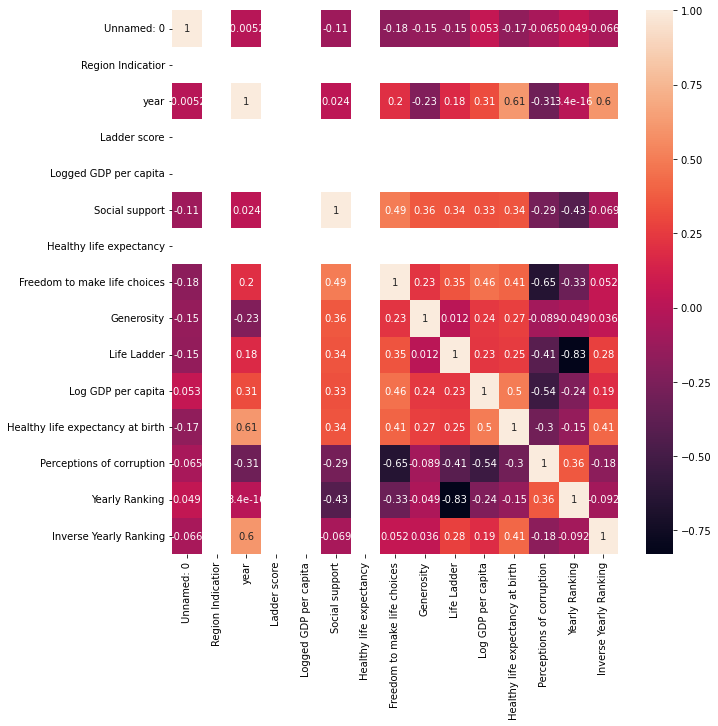

In [62]:
plt.figure(figsize=(10,10))
sns.heatmap(happiness.corr(), annot = True)

In [ ]:
#drop columns

## Visualization: Mortality

new dataset

In [63]:
mortality = pd.read_csv('MortalityDataWHR2021C2.csv')
mortality.describe()

,Population 2020,Population 2019,Island,WHO Western Pacific Region,Female head of government,"All-cause death count, 2017","All-cause death count, 2018","All-cause death count, 2019","All-cause death count, 2020"
count,1.640000e+02,1.640000e+02,166.000000,166.000000,166.000000,6.300000e+01,6.400000e+01,6.400000e+01,6.500000e+01
mean,4.718124e+07,4.646257e+07,0.132530,0.084337,0.138554,2.543131e+05,2.543317e+05,2.552972e+05,2.984399e+05
std,1.598697e+08,1.568124e+08,0.340092,0.278734,0.346526,4.835330e+05,4.844878e+05,4.861756e+05,5.654272e+05
min,3.412500e+05,3.613130e+05,0.000000,0.000000,0.000000,2.229000e+03,2.247000e+03,2.200000e+03,2.321000e+03
25%,4.827881e+06,4.730215e+06,0.000000,0.000000,0.000000,2.884000e+04,3.015150e+04,2.995400e+04,3.317700e+04
50%,1.126017e+07,1.116260e+07,0.000000,0.000000,0.000000,7.004900e+04,6.932850e+04,7.049700e+04,9.155300e+04
75%,3.380537e+07,3.375262e+07,0.000000,0.000000,0.000000,1.696710e+05,1.722710e+05,1.743490e+05,2.145030e+05
max,1.439324e+09,1.397715e+09,1.000000,1.000000,1.000000,2.810927e+06,2.839076e+06,2.852747e+06,3.424996e+06


In [64]:
print= ('Dimensions of dataset: mortality.shape')
mortality.dtypes

Country name                                                                    object
Population 2020                                                                float64
Population 2019                                                                float64
COVID-19 deaths per 100,000 population in 2020                                  object
Median age                                                                      object
Island                                                                           int64
Index of exposure to COVID-19  infections in other countries as of March 31     object
Log of average distance to SARS countries                                       object
WHO Western Pacific Region                                                       int64
Female head of government                                                        int64
Index of institutional trust                                                    object
Gini coefficient of income                 